<a href="https://colab.research.google.com/github/ehsan94/Deep-Learning/blob/master/Deutschland_COVID91_SHAP_121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install shap
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import shap

In [ ]:
df = pd.read_stata('/content/std_inz_later121.dta')

In [ ]:
Y = df['std_inz_later121']
X = df.loc[:, ~df.columns.isin(['std_inz_later121', 'eastwest'])]

In [ ]:
rf = RandomForestRegressor( random_state=0, n_estimators=3000, max_features = "auto")
rf.fit(X, Y)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

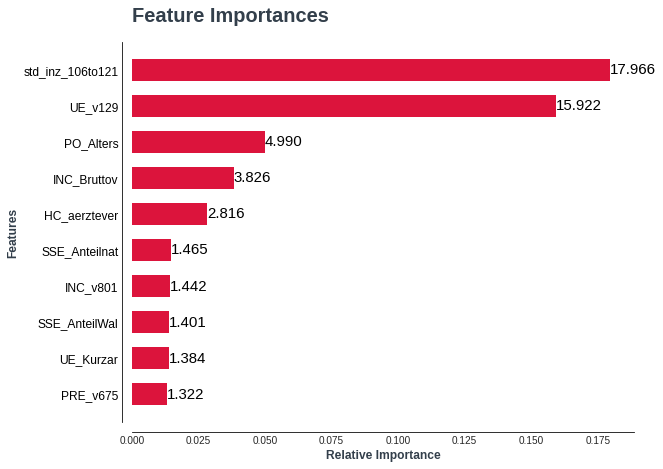

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X.columns
fig, ax = plt.subplots(figsize=(9,7))
plt.style.use('seaborn-white')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
idx = np.argsort(importances)[-10:][::-1]
plt.title('Feature Importances',loc='left', pad=20, color = '#333F4B', fontweight='black',fontsize=20)
plt.barh(range(len(idx)), importances[idx],  0.60 ,color='crimson', align='center')

plt.yticks(range(len(idx)), [features[i] for i in idx], color='black',fontsize=12)
plt.xlabel('Relative Importance',fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('Features',fontsize=12, fontweight='black', color = '#333F4B')
plt.gca().invert_yaxis()

for index, value in enumerate(importances[idx]):
    plt.text(value, index, str(format(value*100, ".3f")),  ha='left',va='center',fontsize=15 , color='black')




In [ ]:
explainer = shap.KernelExplainer(rf.predict,X)
shap_values = explainer.shap_values(X, nsamples=100)

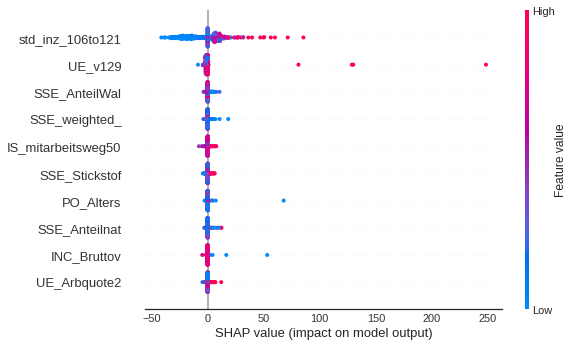

In [ ]:
shap.summary_plot(shap_values, X,max_display=10)

# **West Germany**

In [ ]:
df = pd.read_stata('/content/std_inz_later121.dta')

In [ ]:
df = df[df['eastwest'] == 1.0]
Y = df['std_inz_later121']
X = df.loc[:, ~df.columns.isin(['std_inz_later121', 'eastwest'])]

In [ ]:

rf = RandomForestRegressor( random_state=0, n_estimators=3000, max_features = "auto")
rf.fit(X, Y)  

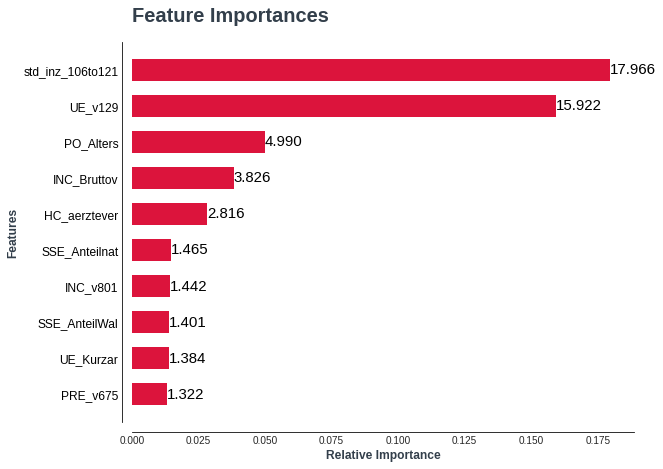

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X.columns
fig, ax = plt.subplots(figsize=(9,7))
plt.style.use('seaborn-white')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
idx = np.argsort(importances)[-10:][::-1]
plt.title('Feature Importances',loc='left', pad=20, color = '#333F4B', fontweight='black',fontsize=20)
plt.barh(range(len(idx)), importances[idx],  0.60 ,color='crimson', align='center')

plt.yticks(range(len(idx)), [features[i] for i in idx], color='black',fontsize=12)
plt.xlabel('Relative Importance',fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('Features',fontsize=12, fontweight='black', color = '#333F4B')
plt.gca().invert_yaxis()

for index, value in enumerate(importances[idx]):
    plt.text(value, index, str(format(value*100, ".3f")),  ha='left',va='center',fontsize=15 , color='black')




In [ ]:
explainer = shap.KernelExplainer(rf.predict,X)
shap_values = explainer.shap_values(X, nsamples=100)

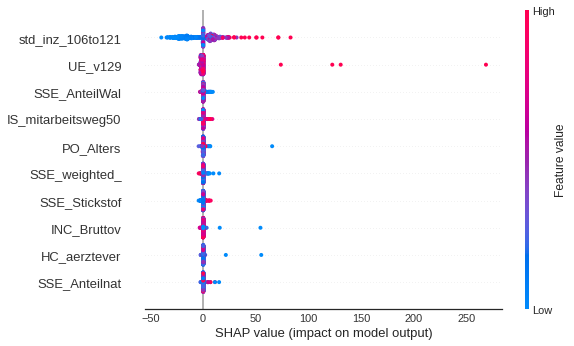

In [ ]:
shap.summary_plot(shap_values, X,max_display=10)

# **East Germany**

In [ ]:
df = pd.read_stata('/content/std_inz_later121.dta')

In [10]:
df = df[df['eastwest'] == 0.0]
Y = df['std_inz_later121']
X = df.loc[:, ~df.columns.isin(['std_inz_later121', 'eastwest'])]

In [ ]:
rf = RandomForestRegressor( random_state=0, n_estimators=3000, max_features = "auto")
rf.fit(X, Y)  

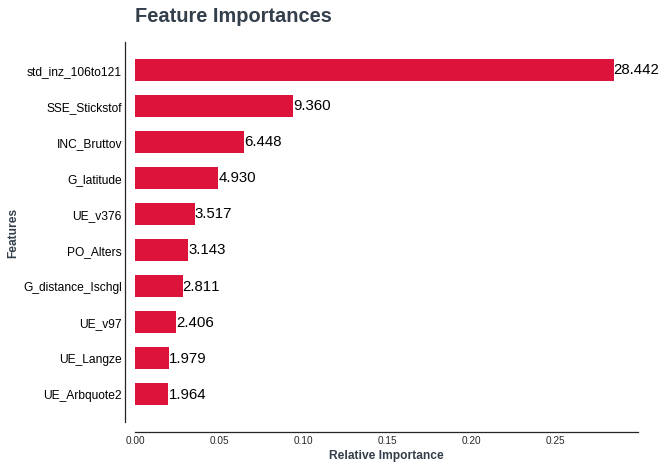

In [12]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X.columns
fig, ax = plt.subplots(figsize=(9,7))
plt.style.use('seaborn-white')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
idx = np.argsort(importances)[-10:][::-1]
plt.title('Feature Importances',loc='left', pad=20, color = '#333F4B', fontweight='black',fontsize=20)
plt.barh(range(len(idx)), importances[idx],  0.60 ,color='crimson', align='center')

plt.yticks(range(len(idx)), [features[i] for i in idx], color='black',fontsize=12)
plt.xlabel('Relative Importance',fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('Features',fontsize=12, fontweight='black', color = '#333F4B')
plt.gca().invert_yaxis()

for index, value in enumerate(importances[idx]):
    plt.text(value, index, str(format(value*100, ".3f")),  ha='left',va='center',fontsize=15 , color='black')




In [ ]:
explainer = shap.KernelExplainer(rf.predict,X)
shap_values = explainer.shap_values(X, nsamples=100)

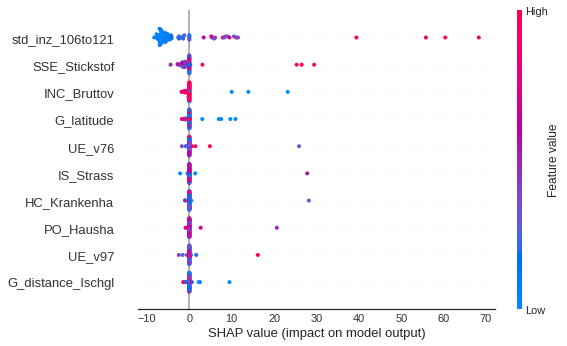

In [14]:
shap.summary_plot(shap_values, X,max_display=10)